In [83]:
# Data exploration and preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score, train_test_split


# Data visualization
import matplotlib.pyplot as plt

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, roc_curve,auc
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Import the data

In [84]:
df = pd.read_csv("/Users/muktapathak/Desktop/sujoy/bankloan.csv")
df.head()


,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [85]:
df1 =df.copy()

# Balanced or Unbalanced

In [86]:
df1['Personal.Loan'].value_counts()

0    4520
1     480
Name: Personal.Loan, dtype: int64

<Axes: ylabel='Personal.Loan'>

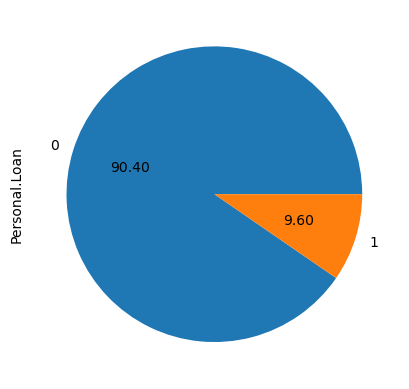

In [87]:
df1['Personal.Loan'].value_counts().plot.pie(autopct='%.2f') 

In a balanced dataset, we expect the counts of different classes to be roughly equal. In this case, the class which indicates " no personal loan" (0) is significantly more prevalent than the class which indicates "personal loan"(1). Therefore, the data is not balanced.

# Descriptive Statistics

In [88]:
statistics = df1.describe().transpose()
statistics

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP.Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal.Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Handling Outliers

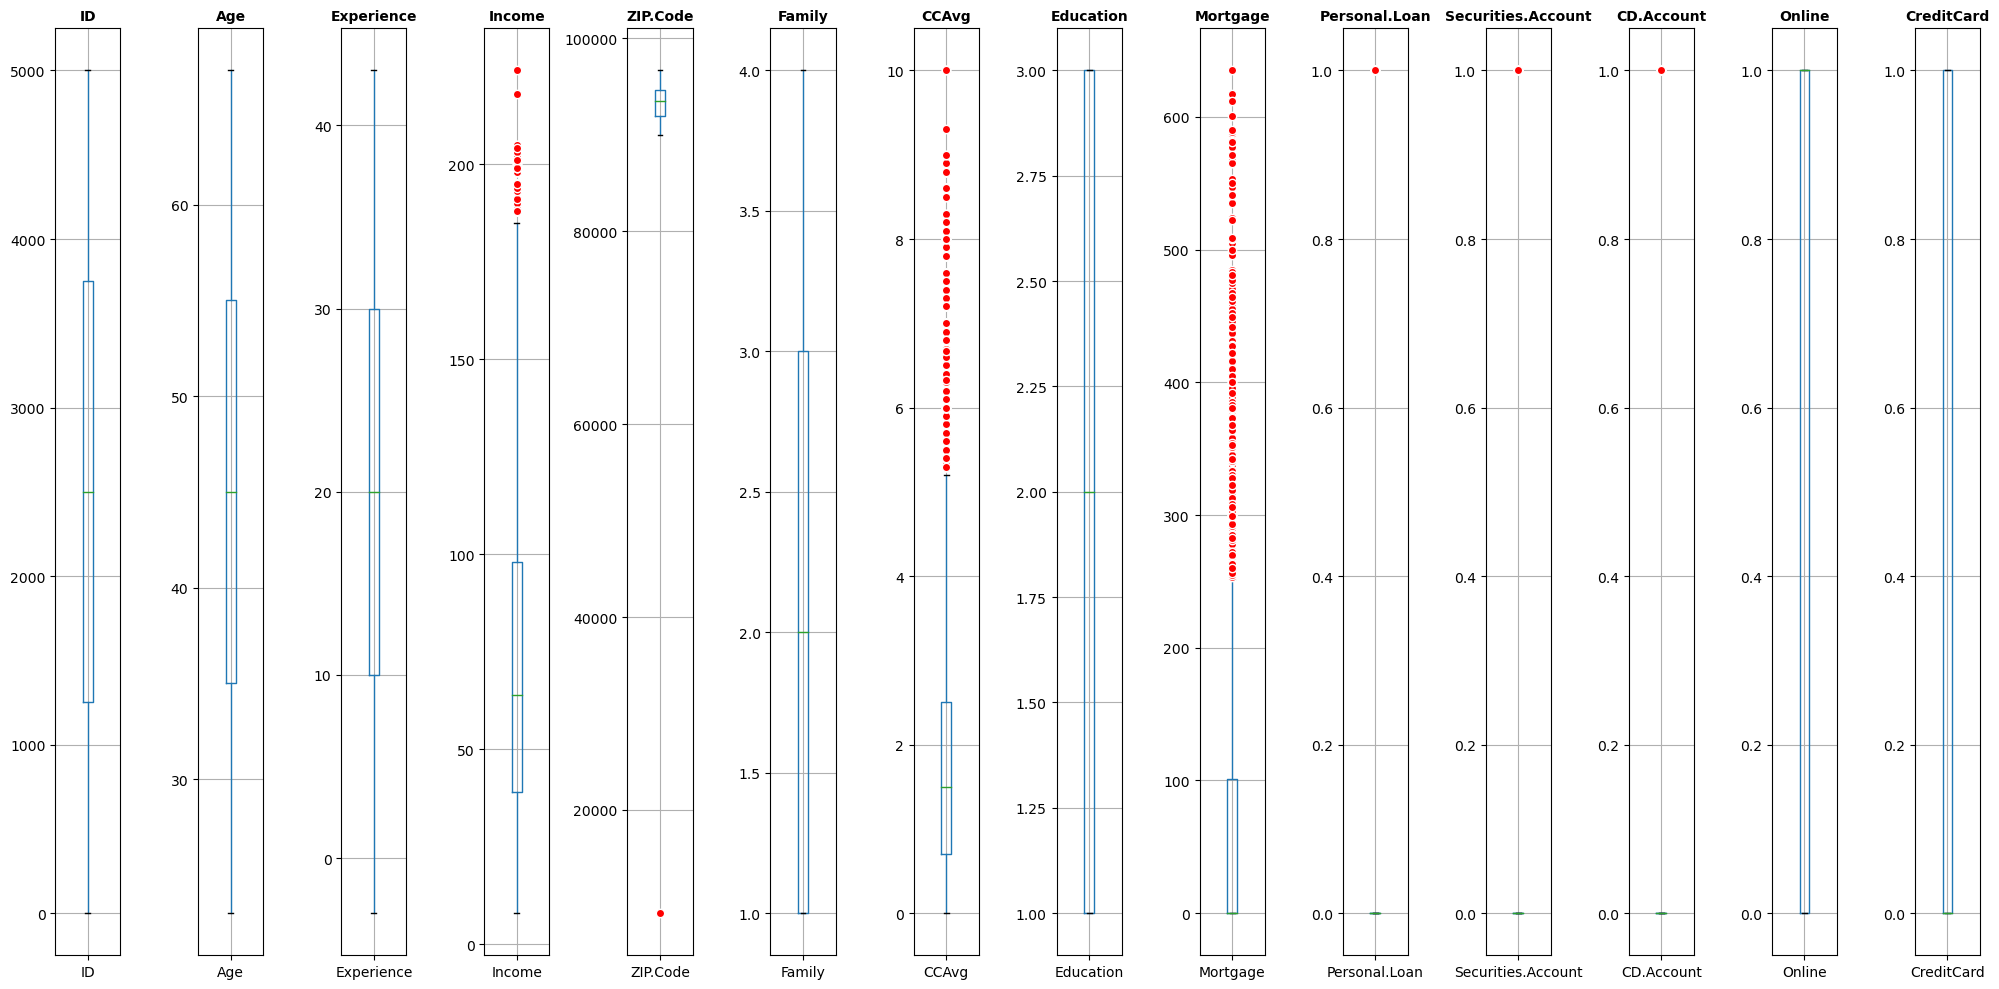

In [89]:
# Create box plots for all columns in the DataFrame

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white') 
fig, axs = plt.subplots(1, len(df1.columns), figsize=(20, 10))

for i, ax in enumerate(axs.flat):
    df.boxplot(column=df1.columns[i], ax=ax, flierprops=red_circle)
    ax.set_title(df1.columns[i], fontsize=10, fontweight='bold')
    ax.tick_params(axis='y', labelsize=10) 

plt.tight_layout()
plt.show()

<Axes: xlabel='Income', ylabel='Count'>

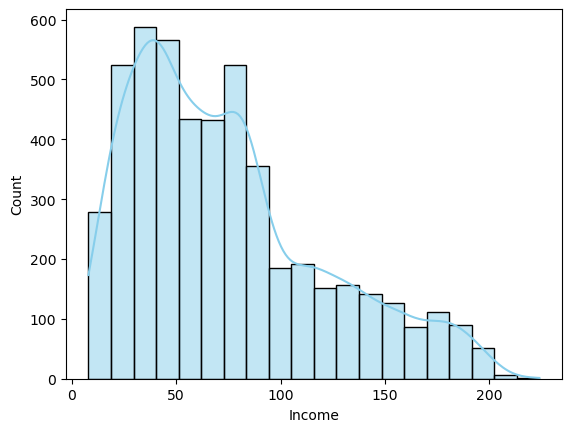

In [90]:
sns.histplot(df1['Income'], bins=20, kde=True, color='skyblue')

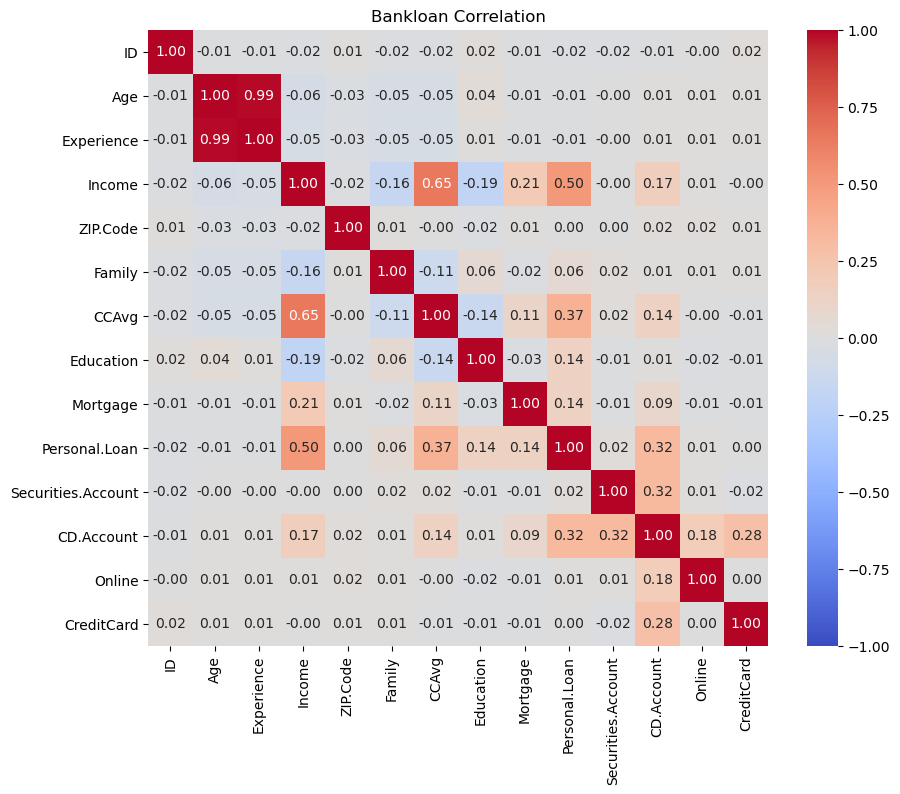

In [91]:
# Calculate correlation matrix
df_corr = df1.corr().round(2)

# Create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
heatmap.set_title("Bankloan Correlation")
plt.show()

# Study the outliers

In [92]:
columns_to_check = ['Income', 'CCAvg', 'Mortgage']  # Replace with your actual column names

# Set the threshold for identifying outliers (e.g., 3 standard deviations)
threshold = 3

# Function to find outliers using mean and standard deviation
def find_outliers(df1, columns, threshold):
    outliers = pd.DataFrame()
    for column in columns:
        mean_val = df1[column].mean()
        std_val = df1[column].std()
        lower_bound = mean_val - threshold * std_val
        upper_bound = mean_val + threshold * std_val
        column_outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
        outliers = pd.concat([outliers, column_outliers], axis=0)
    return outliers

# Find outliers in specified columns
outliers_df = find_outliers(df1, columns_to_check, threshold)

outliers_df

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
3896,3897,48,24,224,93940,2,6.67,1,0,0,0,1,1,1
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0
18,19,46,21,193,91604,2,8.10,3,0,1,0,0,0,0
55,56,41,17,139,94022,2,8.00,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4672,4673,52,26,180,95831,1,1.70,1,550,0,0,0,1,0
4698,4699,48,22,162,94143,3,1.40,1,400,1,0,0,0,0
4812,4813,29,4,184,92126,4,2.20,3,612,1,0,0,1,0
4842,4843,49,23,174,95449,3,4.60,2,590,1,0,0,0,0


<Axes: xlabel='Income', ylabel='Count'>

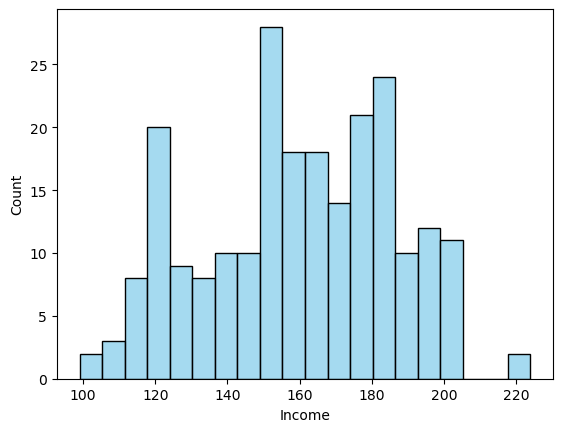

In [93]:
sns.histplot(outliers_df['Income'], bins=20, color='skyblue')

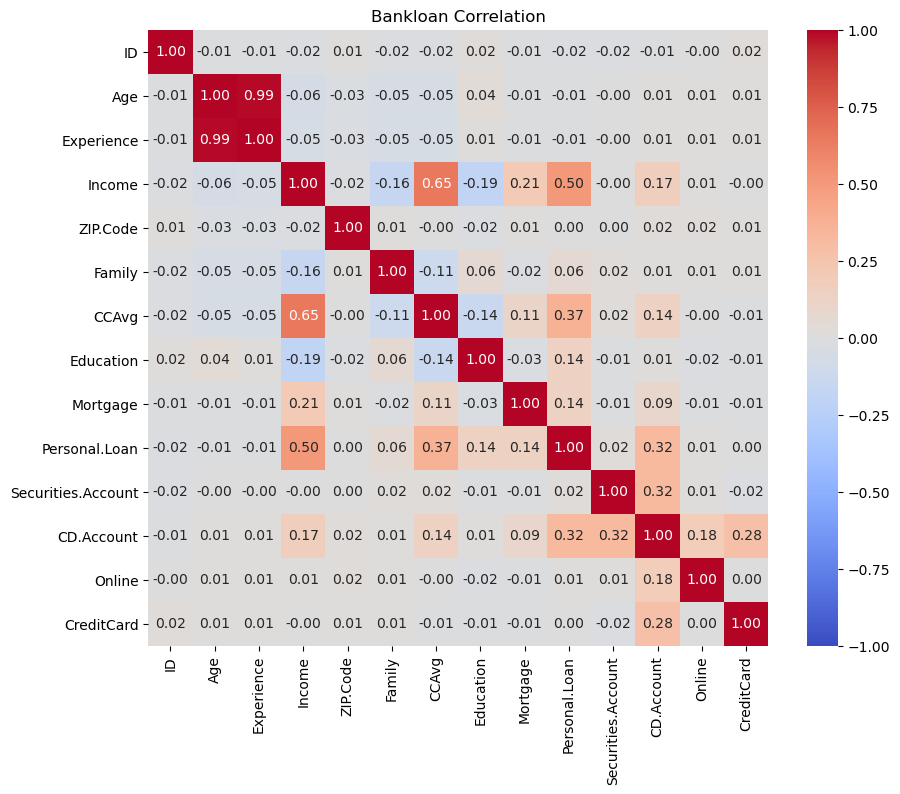

In [94]:
# Calculate correlation matrix
df_corr_out = outliers_df.corr().round(2)

# Create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
heatmap.set_title("Bankloan Correlation")
plt.show()

# Missing Values

In [95]:
# Identify the number of missing values in each columns.

df_missing = df1.isnull().sum()
df_missing

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

# Data Spliting

In [96]:
X = df1.drop(columns=['Personal.Loan'])
y = df1['Personal.Loan']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancing (Random Undersampling)

In [97]:
y_train.value_counts()

0    3625
1     375
Name: Personal.Loan, dtype: int64

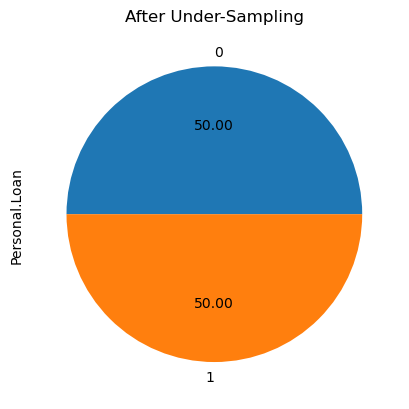

In [98]:
# Under sampling
rus = RandomUnderSampler(sampling_strategy=1)
X_train, y_train = rus.fit_resample(X_train, y_train)

ax = y_train.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("After Under-Sampling")

plt.show()

In [99]:
# class distribution after balancing
y_train.value_counts()

0    375
1    375
Name: Personal.Loan, dtype: int64

# Feature Engineering

In [100]:
# Standardization
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.fit_transform(X_test)

#  Random Forest Model

In [101]:
Ran_model = RandomForestClassifier() # Creating the model
Ran_model.fit(X_train,y_train) # Training the model
y_pred = Ran_model.predict(X_test) # Testing the model

In [102]:
print(classification_report(y_test,y_pred)) # model evaluation


              precision    recall  f1-score   support

           0       1.00      0.73      0.84       895
           1       0.30      0.99      0.46       105

    accuracy                           0.76      1000
   macro avg       0.65      0.86      0.65      1000
weighted avg       0.93      0.76      0.80      1000



# Accuracy of Random Forest Classifier

In [103]:
scores = cross_val_score(Ran_model,X_train,y_train, scoring = 'accuracy',cv = 10).mean()
print("The mean accuracy with 10 fold cross validation is %s"%round(scores*100,2))

The mean accuracy with 10 fold cross validation is 96.4


#  Hyperparameter Tuning

In [104]:
param_dist= {'n_estimators':randint(50,500),'max_depth':randint(1,20),'min_samples_split': randint(100, 300),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']}
rf = RandomForestClassifier()

In [105]:
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist,n_iter = 10, cv=10)
rand_search.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x135bee860>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x135bee8f0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13597fcd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x137251510>})

In [106]:
# Best Estimates
best_rf = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 140, 'n_estimators': 457}


In [107]:
# Creating the model with the best hyperparameters
rf = RandomForestClassifier(
    bootstrap=True,
    criterion='entropy',
    max_depth=19,
    min_samples_leaf=8,
    min_samples_split=146,
    n_estimators=463
)

# Training the model
rf.fit(X_train, y_train)

# Testing the model
y_pred = rf.predict(X_test)

# Displaying the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75       895
           1       0.22      1.00      0.37       105

    accuracy                           0.64      1000
   macro avg       0.61      0.80      0.56      1000
weighted avg       0.92      0.64      0.71      1000



In [108]:
scores = cross_val_score(rf,X_train,y_train, scoring = 'accuracy',cv = 10).mean()
print("The mean accuracy with 10 fold cross validation is %s"%round(scores*100,2))

The mean accuracy with 10 fold cross validation is 91.33


# Actual versus Predicted

/Users/muktapathak/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/muktapathak/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


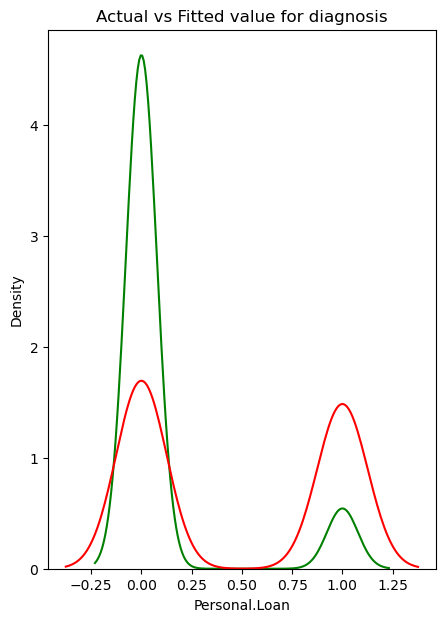

In [109]:
plt.figure(figsize=(5,7))
ax = sns.distplot(y_test,hist = False,color = "g",label = "Actual Value")
sns.distplot(y_pred,hist = False,color = "r",label = "Fitted Values",ax = ax)
plt.title('Actual vs Fitted value for diagnosis')
plt.show()
plt.close()

<Axes: >

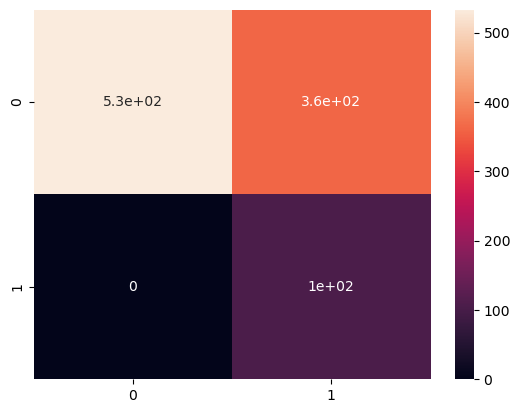

In [110]:
cm=confusion_matrix(y_test,y_pred) # Confusion matrix
sns.heatmap(cm,annot = True)

#  Logistic Regression Model

In [111]:
log = LogisticRegression() # Creating the model
log.fit(X_train,y_train) # Training the model

LogisticRegression()

In [112]:
y_pred = log.predict(X_test) # Testing the model


In [113]:
print(classification_report(y_test,y_pred)) # model evaluation
confusion_matrix(y_test,y_pred) # Confusion matrix

              precision    recall  f1-score   support

           0       1.00      0.62      0.76       895
           1       0.23      1.00      0.38       105

    accuracy                           0.66      1000
   macro avg       0.62      0.81      0.57      1000
weighted avg       0.92      0.66      0.72      1000



array([[552, 343],
       [  0, 105]])

In [114]:
scores = cross_val_score(log,X_train,y_train, scoring = 'accuracy',cv = 10).mean()
print("The mean accuracy with 10 fold cross validation is %s"%round(scores*100,2))

The mean accuracy with 10 fold cross validation is 88.67


/Users/muktapathak/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/muktapathak/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


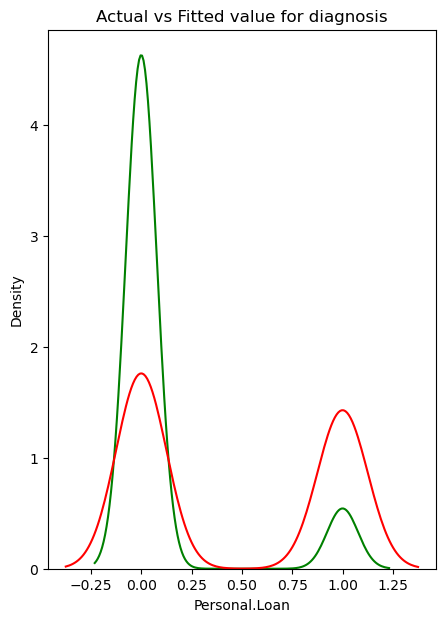

In [115]:
plt.figure(figsize=(5,7))
ax = sns.distplot(y_test,hist = False,color = "g",label = "Actual Value")
sns.distplot(y_pred,hist = False,color = "r",label = "Fitted Values",ax = ax)
plt.title('Actual vs Fitted value for diagnosis')
plt.show()
plt.close()

<Axes: >

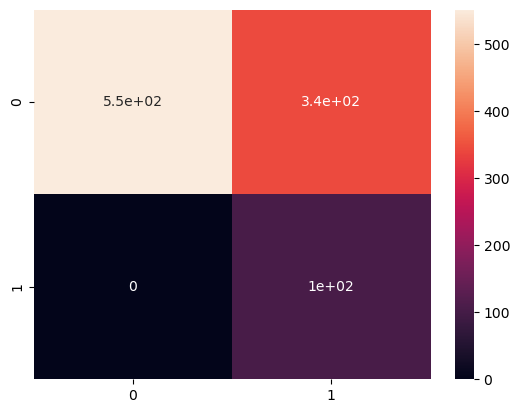

In [116]:
cm=confusion_matrix(y_test,y_pred) # Confusion matrix
sns.heatmap(cm,annot = True)

# Model Comparison 

In [117]:
def plot_roc(X_test, y_test, models):
    for name, model in models.items():
        if hasattr(model, 'decision_function'):
            probs = model.decision_function(X_test)
        elif hasattr(model, 'predict_proba'):
            probs = model.predict_proba(X_test)[:, 1]  # Select the probability of the positive cla

        fpr, tpr, threshold = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
        print(f'ROC AUC for {name}: {roc_auc:.2f}')
        plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.2f})')

    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'b--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()


ROC AUC for log: 0.97
ROC AUC for Ran_model: 0.94


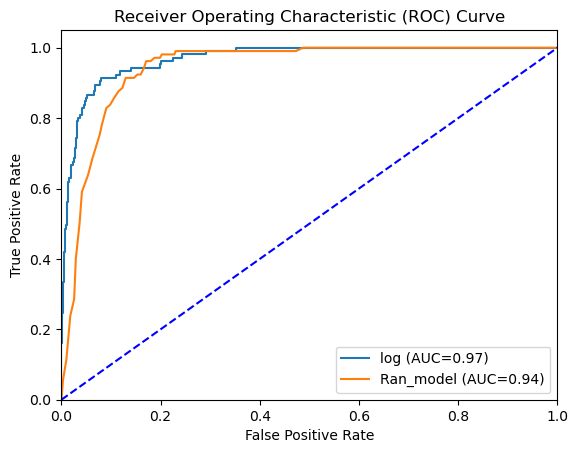

In [118]:
models = {'log':log,'Ran_model':Ran_model}
plot_roc(X_test,y_test,models)

# WITHOUT OUTLIERS

In [119]:
df_no_outliers = df.drop(outliers_df.index)
df_no_outliers

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [120]:
X = df_no_outliers.drop(columns=['Personal.Loan'])
y = df_no_outliers['Personal.Loan']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

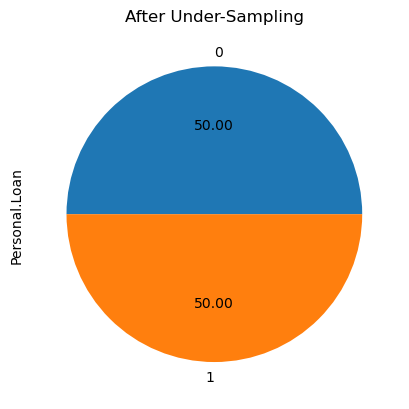

In [121]:
# Under sampling
rus = RandomUnderSampler(sampling_strategy=1)
X_train, y_train = rus.fit_resample(X_train, y_train)

ax = y_train.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("After Under-Sampling")

plt.show()

In [122]:
# Standardization
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.fit_transform(X_test)

In [123]:
log = LogisticRegression() # Creating the model
log.fit(X_train,y_train) # Training the model
y_pred = log.predict(X_test) # Testing the model

In [124]:
print(classification_report(y_test,y_pred)) # model evaluation

              precision    recall  f1-score   support

           0       1.00      0.60      0.75       892
           1       0.16      1.00      0.27        66

    accuracy                           0.63       958
   macro avg       0.58      0.80      0.51       958
weighted avg       0.94      0.63      0.72       958



In [125]:
scores = cross_val_score(log,X_train,y_train, scoring = 'accuracy',cv = 10).mean()
print("The mean accuracy with 10 fold cross validation is %s"%round(scores*100,2))

The mean accuracy with 10 fold cross validation is 89.74


/Users/muktapathak/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/muktapathak/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


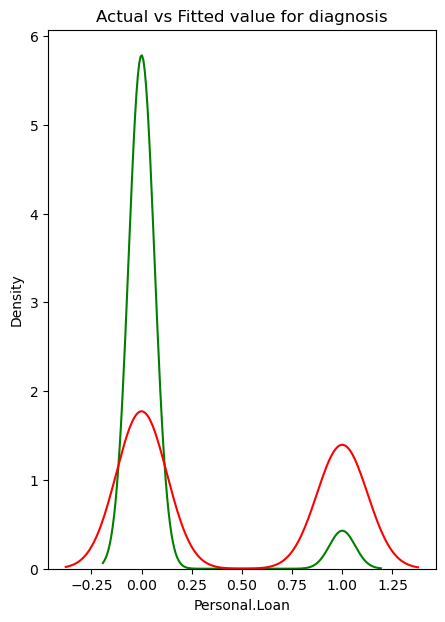

In [126]:
plt.figure(figsize=(5,7))
ax = sns.distplot(y_test,hist = False,color = "g",label = "Actual Value")
sns.distplot(y_pred,hist = False,color = "r",label = "Fitted Values",ax = ax)
plt.title('Actual vs Fitted value for diagnosis')
plt.show()
plt.close()

In [127]:
Ran_model = RandomForestClassifier() # Creating the model
Ran_model.fit(X_train,y_train) # Training the model
y_pred = Ran_model.predict(X_test) # Testing the model

In [128]:
print(classification_report(y_test,y_pred)) # model evaluation

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       892
           1       0.20      0.98      0.33        66

    accuracy                           0.72       958
   macro avg       0.60      0.84      0.57       958
weighted avg       0.94      0.72      0.79       958



In [129]:
scores = cross_val_score(Ran_model,X_train,y_train, scoring = 'accuracy',cv = 10).mean()
print("The mean accuracy with 10 fold cross validation is %s"%round(scores*100,2))

The mean accuracy with 10 fold cross validation is 96.64


/Users/muktapathak/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/muktapathak/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


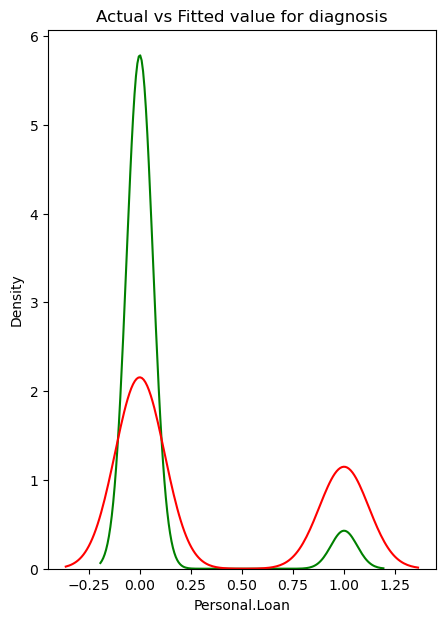

In [130]:
plt.figure(figsize=(5,7))
ax = sns.distplot(y_test,hist = False,color = "g",label = "Actual Value")
sns.distplot(y_pred,hist = False,color = "r",label = "Fitted Values",ax = ax)
plt.title('Actual vs Fitted value for diagnosis')
plt.show()
plt.close()

# Model for outliers

In [131]:
outliers_df

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
3896,3897,48,24,224,93940,2,6.67,1,0,0,0,1,1,1
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0
18,19,46,21,193,91604,2,8.10,3,0,1,0,0,0,0
55,56,41,17,139,94022,2,8.00,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4672,4673,52,26,180,95831,1,1.70,1,550,0,0,0,1,0
4698,4699,48,22,162,94143,3,1.40,1,400,1,0,0,0,0
4812,4813,29,4,184,92126,4,2.20,3,612,1,0,0,1,0
4842,4843,49,23,174,95449,3,4.60,2,590,1,0,0,0,0


In [132]:
X = outliers_df.drop(columns=['Personal.Loan'])
y = outliers_df['Personal.Loan']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

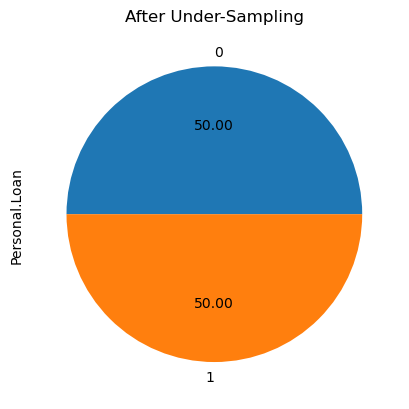

In [133]:
# Under sampling
rus = RandomUnderSampler(sampling_strategy=1)
X_train, y_train = rus.fit_resample(X_train, y_train)

ax = y_train.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("After Under-Sampling")

plt.show()

In [134]:

# Standardization
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.fit_transform(X_test)

In [135]:
log = LogisticRegression() # Creating the model
log.fit(X_train,y_train) # Training the model
y_pred = log.predict(X_test) # Testing the model

In [136]:
print(classification_report(y_test,y_pred)) # model evaluation

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.88      0.88      0.88        16

    accuracy                           0.91        46
   macro avg       0.90      0.90      0.90        46
weighted avg       0.91      0.91      0.91        46



/Users/muktapathak/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/muktapathak/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


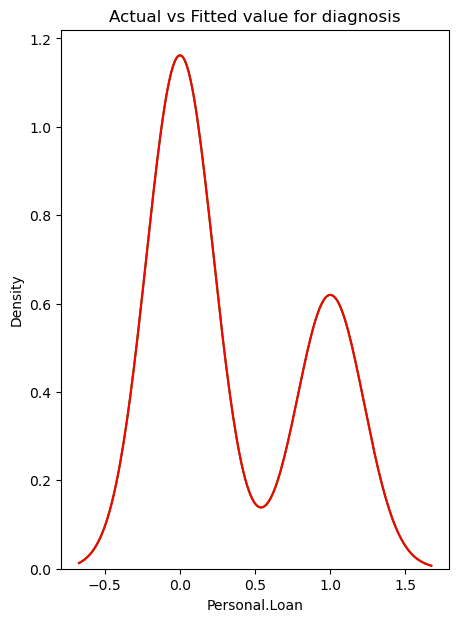

In [137]:
plt.figure(figsize=(5,7))
ax = sns.distplot(y_test,hist = False,color = "g",label = "Actual Value")
sns.distplot(y_pred,hist = False,color = "r",label = "Fitted Values",ax = ax)
plt.title('Actual vs Fitted value for diagnosis')
plt.show()
plt.close()

In [138]:
scores = cross_val_score(log,X_train,y_train, scoring = 'accuracy',cv = 10).mean()
print("The mean accuracy with 10 fold cross validation is %s"%round(scores*100,2))

The mean accuracy with 10 fold cross validation is 88.33


In [139]:
Rf_model = RandomForestClassifier() # Creating the model
Ran_model.fit(X_train,y_train) # Training the model
y_pred = Ran_model.predict(X_test) # Testing the model

In [140]:
print(classification_report(y_test,y_pred)) # model evaluation

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.89      1.00      0.94        16

    accuracy                           0.96        46
   macro avg       0.94      0.97      0.95        46
weighted avg       0.96      0.96      0.96        46



In [141]:
scores = cross_val_score(Rf_model,X_train,y_train, scoring = 'accuracy',cv = 10).mean()
print("The mean accuracy with 10 fold cross validation is %s"%round(scores*100,2))

The mean accuracy with 10 fold cross validation is 96.03
